# comScore Data-Analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms

**activity_data:**  Monthly aggregated data of minutes spent on an app by a device

In [2]:
activity_data = pd.read_csv('activity_data.csv')
activity_data.head()

,device_id,app_name,minutes
0,1255,Snapchat (Mobile App),7.39
1,873,Pinterest (Mobile App),3.88
2,1919,Facebook (Mobile App),116.34
3,1531,Yahoo Mail (Mobile App),238.27
4,748,Netflix (Mobile App),4.59


In [3]:
activity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22440 entries, 0 to 22439
Data columns (total 3 columns):
device_id    22440 non-null int64
app_name     22440 non-null object
minutes      21692 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 526.0+ KB


We observe some missing information in the minutes column.

**app_publisher:** publisher to app_name mapping

In [32]:
app_publisher = pd.read_csv('app_publisher.csv')
app_publisher

,app_name,Publisher
0,Walmart (Mobile App),Wal-Mart
1,Microsoft Word (Mobile App),Microsoft Sites
2,Sam's Club Scan & Go (Mobile App),Wal-Mart
3,Pinterest (Mobile App),Pinterest
4,YouTube (Mobile App),Google Sites
5,Netflix (Mobile App),Netflix Inc.
6,Tumblr (Mobile App),Oath
7,Facebook Messenger (Mobile App),Facebook
8,Kindle (Mobile App),Amazon Sites
9,GroupMe (Mobile App),Microsoft Sites


**demo_info:** demographic information of a device

In [5]:
demo_info = pd.read_csv('demo_info.csv')
demo_info.head()

,device_id,gender_id
0,1125,2.0
1,1465,1.0
2,940,2.0
3,759,2.0
4,1968,2.0


In [6]:
demo_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 2 columns):
device_id    2774 non-null int64
gender_id    2676 non-null float64
dtypes: float64(1), int64(1)
memory usage: 43.4 KB


Some values are missing in the gender_id column. We will see how we deal with the missing information in the further analysis.

**additional_activity_data:** activity data collected from additional users but without device level information. 

In [7]:
add_activity_data = pd.read_csv('additional_activity_data.csv')
add_activity_data.head()

,app_name,total_devices,minutes
0,Kindle (Mobile App),379,43521.39
1,Google Play (Mobile App),3025,104154.07
2,Facebook (Mobile App),2672,2141691.64
3,Walmart (Mobile App),792,16149.21
4,Facebook Messenger (Mobile App),2722,1792877.26


### Final DataFrame

In [8]:
x1 = pd.merge(activity_data, app_publisher, on='app_name', how='left')
final_df = pd.merge(x1, demo_info, on='device_id', how='left')
final_df.head()

,device_id,app_name,minutes,Publisher,gender_id
0,1255,Snapchat (Mobile App),7.39,"Snapchat, Inc",2.0
1,873,Pinterest (Mobile App),3.88,Pinterest,2.0
2,1919,Facebook (Mobile App),116.34,Facebook,2.0
3,1531,Yahoo Mail (Mobile App),238.27,Oath,2.0
4,748,Netflix (Mobile App),4.59,Netflix Inc.,1.0


### Missing value treatment

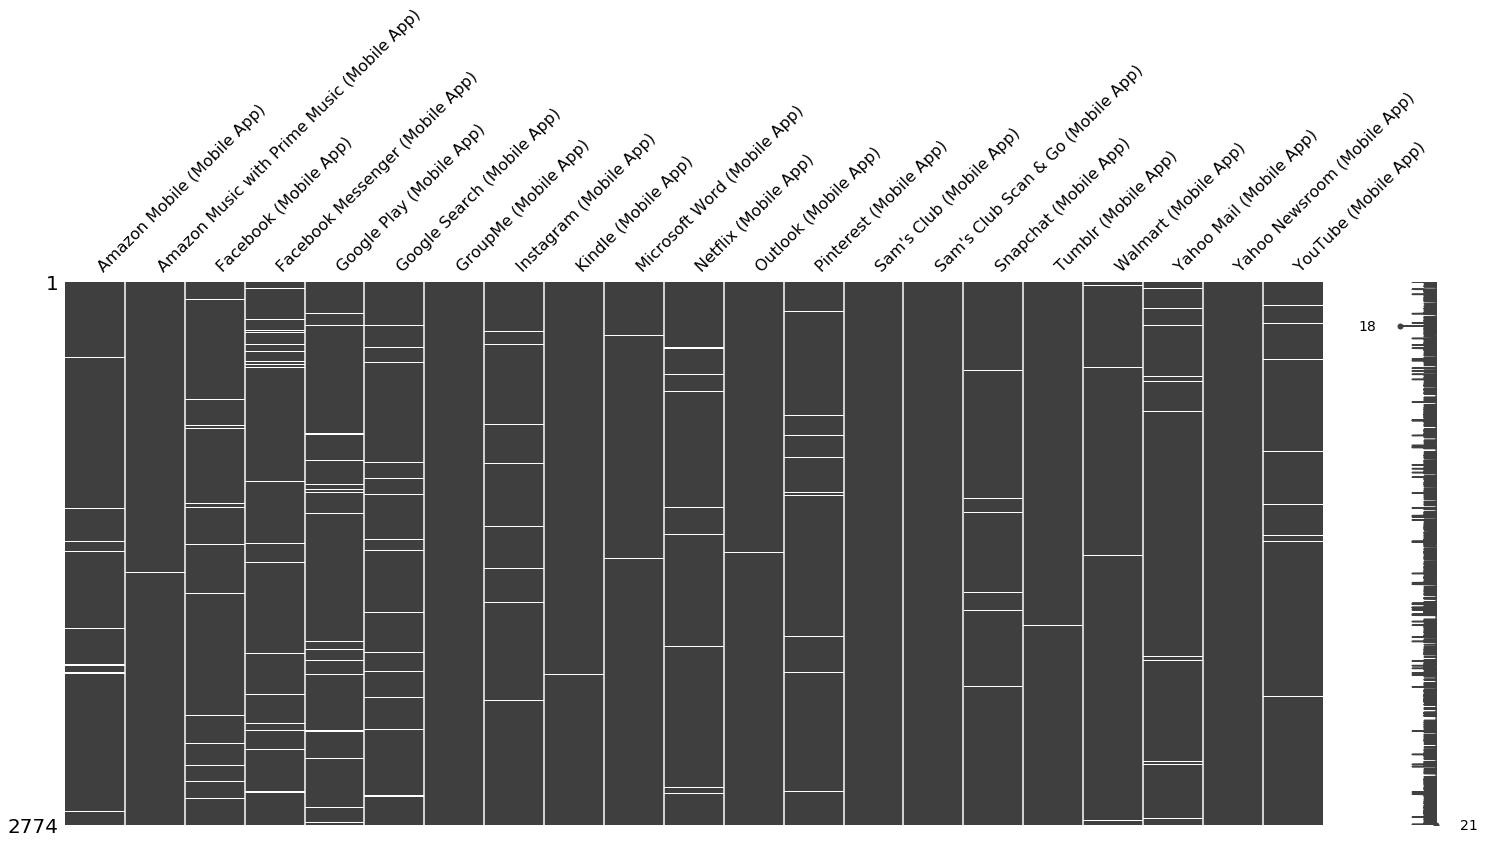

In [9]:
activity_data['minutes'].fillna(-1, inplace=True)
activity_data_pivot = activity_data.pivot_table(index='device_id', columns='app_name', values='minutes',fill_value=0)
activity_data_pivot = activity_data_pivot.replace(-1,np.NaN)
ms.matrix(activity_data_pivot)
plt.show()

There are 3% null values in minutes column for few apps for a device_id. This pattern gives an impression that either user might have downloaded and uninstalled the app which created the row in the database but usage was not found or user never used the app in that entire month. In the worst case, there could have been a problem with the data collected from the app. In the worst-case scenario, there are many ways we can impute missing values with some meaningful statistic. Since there are only 3% missing values and the time considered is for an entire month for comparatively well-known apps, I do not want to create any bias by assuming worst case scenario and imputing values in place of missing information.

In demographic information around 3% of gender, information is missing for some device_id's. device_id is an identifier column and we cannot assume anything upon identifier column. Hence I'm removing missing value rows in this table.

In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22440 entries, 0 to 22439
Data columns (total 5 columns):
device_id    22440 non-null int64
app_name     22440 non-null object
minutes      21692 non-null float64
Publisher    22440 non-null object
gender_id    21659 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.0+ MB


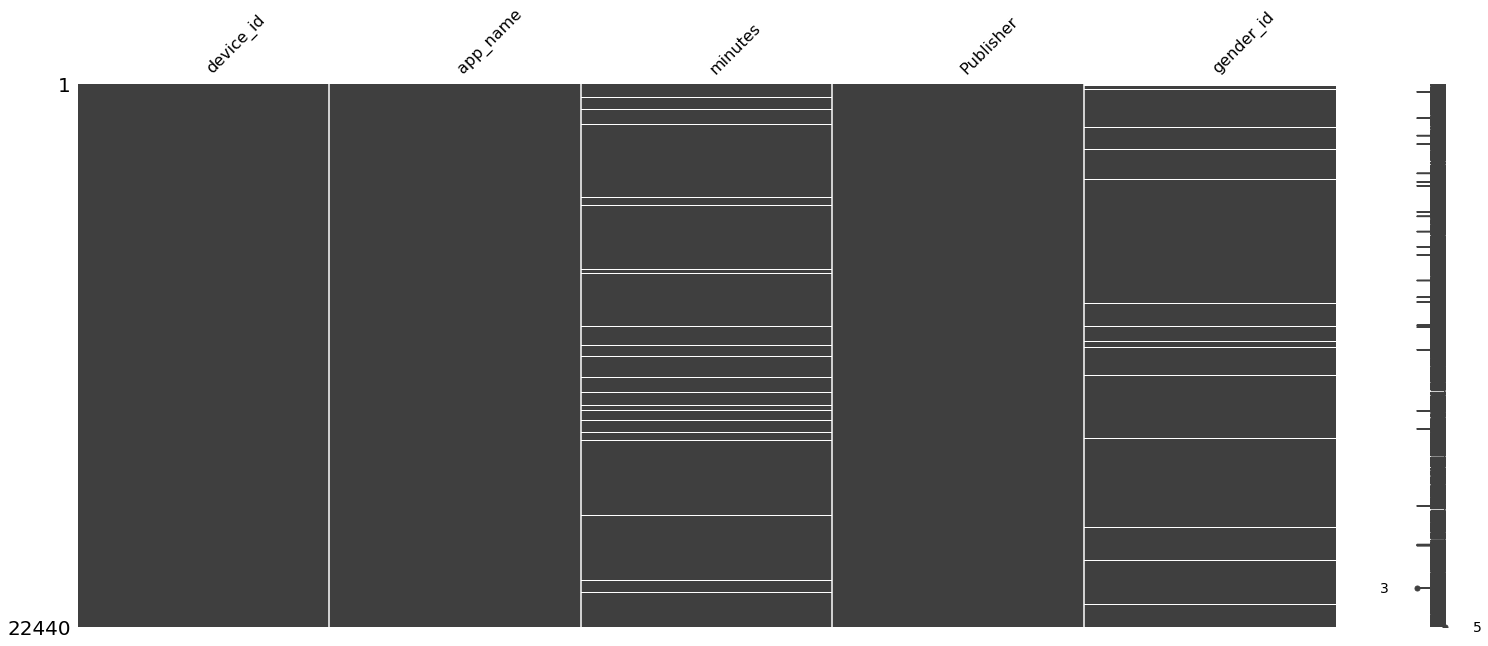

In [11]:
ms.matrix(final_df)
plt.show()

In [12]:
#Dropping Null-values
final_df.dropna(inplace = True)

### Outlier Treatment

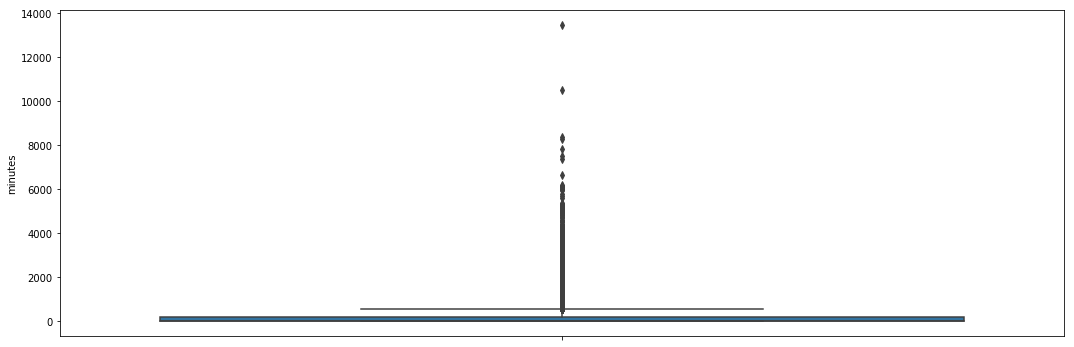

In [13]:
plt.figure(figsize = (18,6))
sns.boxplot(y = 'minutes', data = activity_data)
plt.show()

We observed there are some outliers in the minute's column. I noted down these outliers and perform further analysis accordingly.

## Which App is most installed?

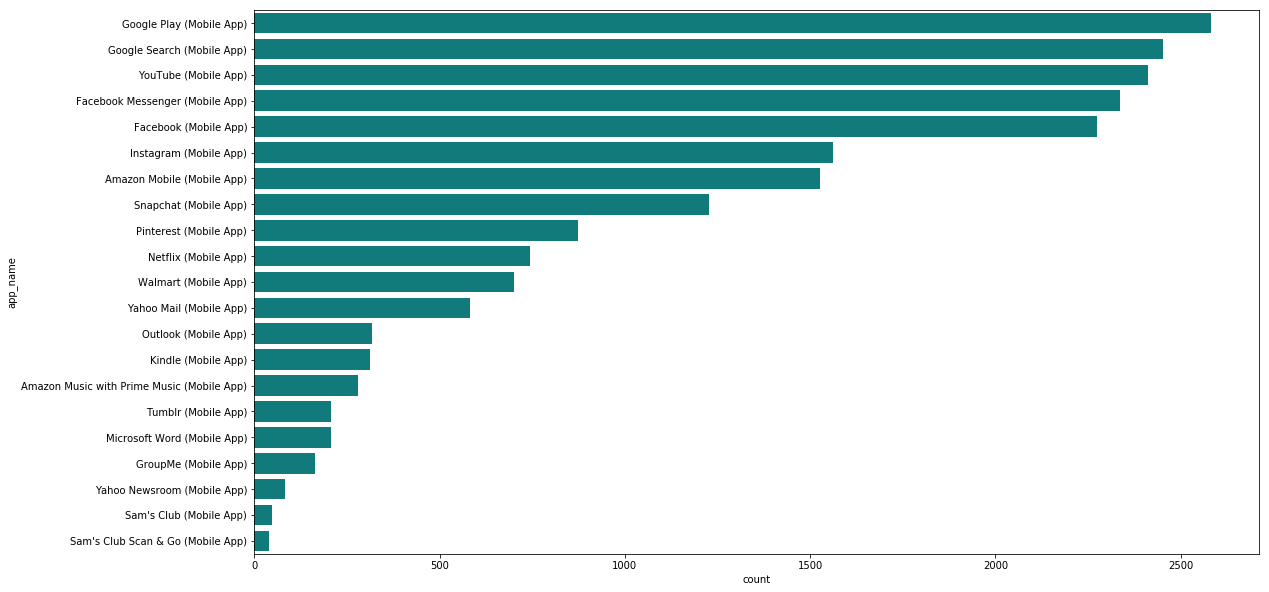

In [14]:
plt.figure(figsize = (18,10))
sns.countplot(y = 'app_name', data = final_df, order = final_df['app_name'].value_counts().index, color = 'darkcyan')
plt.show() 

Google and Facebook applications are majorly used from the above plot.

## Which app is most used or has more customer engagement?

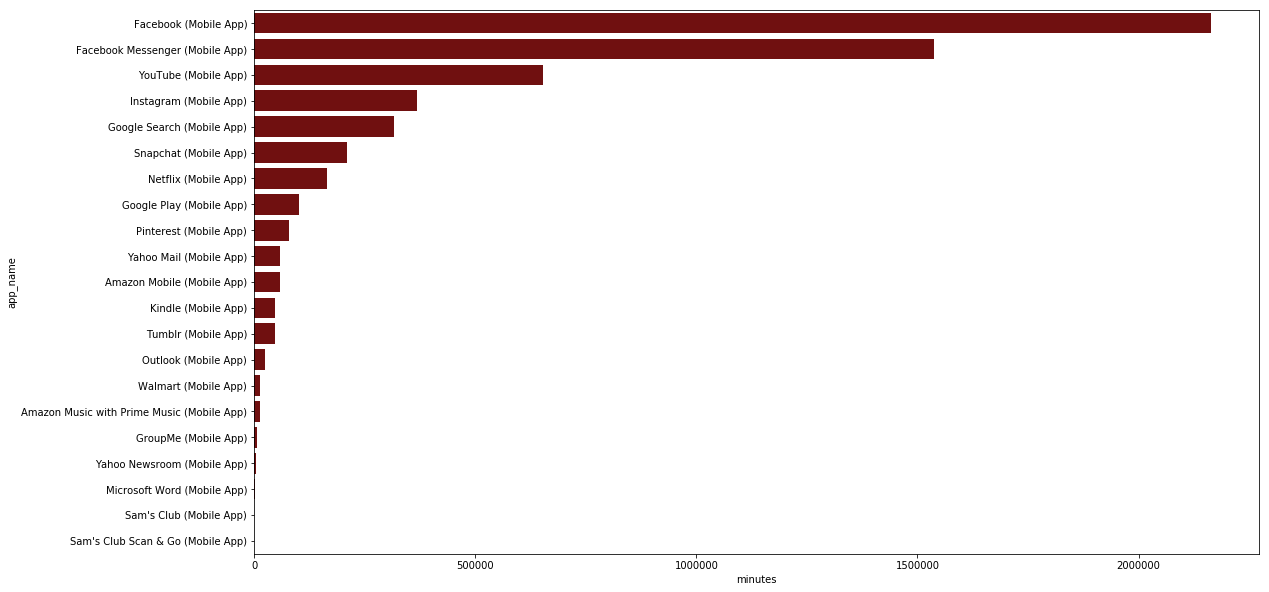

In [15]:
total_minutes_by_app = pd.DataFrame(final_df.groupby('app_name')['minutes'].sum().reset_index())
total_minutes_by_app = total_minutes_by_app.sort_values(['minutes'], ascending = False)

plt.figure(figsize = (18,10))
sns.barplot(x = 'minutes', y = 'app_name', data = total_minutes_by_app, color = 'maroon')
plt.show()

Facebook products still stand at the top. As of now, it looks like most of the user's installed facebook apps as well as spend most of their time on Facebook products. However, since we observed a few outliers above I am introducing another metric to evaluate the most used app.

## Metric Design

**Average App usage per device:** (Total Minutes per app) / (Number of devices per app)

In [16]:
final_df.head()

,device_id,app_name,minutes,Publisher,gender_id
0,1255,Snapchat (Mobile App),7.39,"Snapchat, Inc",2.0
1,873,Pinterest (Mobile App),3.88,Pinterest,2.0
2,1919,Facebook (Mobile App),116.34,Facebook,2.0
3,1531,Yahoo Mail (Mobile App),238.27,Oath,2.0
4,748,Netflix (Mobile App),4.59,Netflix Inc.,1.0


In [33]:
f = {'app_name' : ['count'], 'minutes' : ['sum']}

avg_app_usage = final_df.groupby('app_name').agg(f).reset_index()
avg_app_usage.columns = avg_app_usage.columns.droplevel()
avg_app_usage.columns = ['app_name','total_devices','total_minutes']
avg_app_usage['avg_usage'] = avg_app_usage['total_minutes']/avg_app_usage['total_devices']

avg_app_usage.head()

,app_name,total_devices,total_minutes,avg_usage
0,Amazon Mobile (Mobile App),1526,58151.40,38.107077
1,Amazon Music with Prime Music (Mobile App),280,14123.68,50.441714
2,Facebook (Mobile App),2274,2163280.79,951.310814
3,Facebook Messenger (Mobile App),2337,1538438.24,658.296209
4,Google Play (Mobile App),2581,101574.14,39.354568


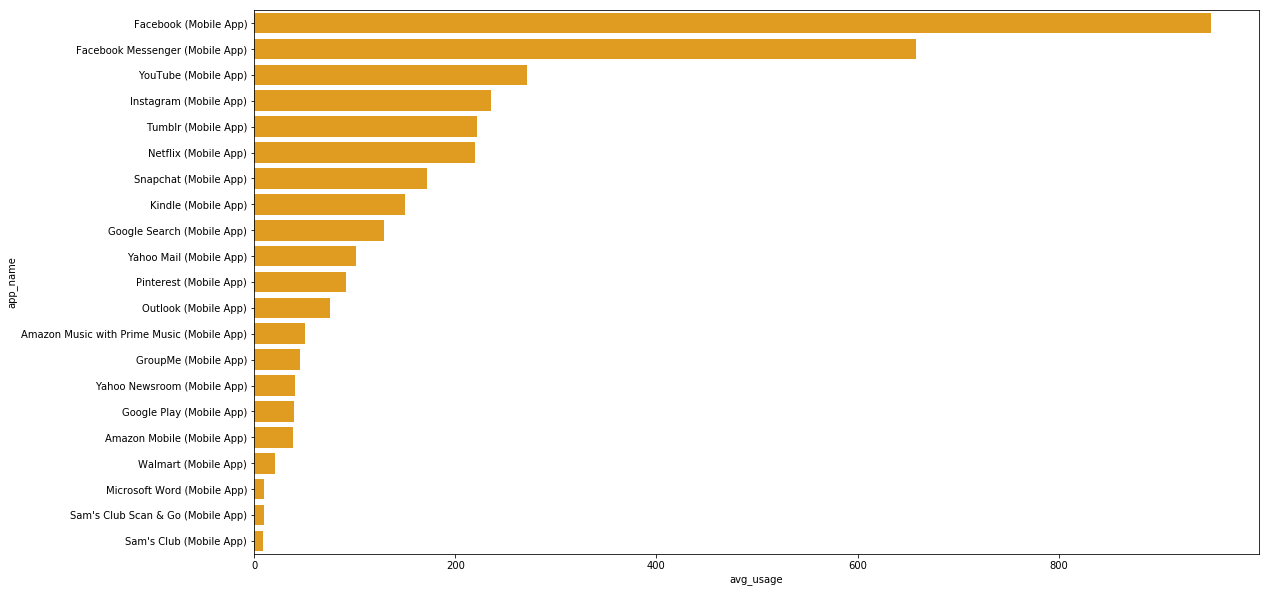

In [18]:
avg_app_usage = avg_app_usage.sort_values('avg_usage', ascending = False)

plt.figure(figsize = (18,10))
sns.barplot(x = 'avg_usage', y = 'app_name', data = avg_app_usage, color = 'orange')
plt.show()

On average users spend the most time on Facebook apps followed by Youtube, Instagram, Tumblr & Netflix. An interesting observation is one of the most used app Tumblr did not show up in previous plots.

And the most installed app 'Google Play' is not the most used on an average.

## Gender based analysis

1.0 - Male

2.0 - Female

In [19]:
demo_info.gender_id.value_counts()

2.0    1657
1.0    1019
Name: gender_id, dtype: int64

In [20]:
print('Female: ' + str((1657/2676)*100) + '%')
print('Male: ' + str((1019/2676)*100) + '%')

Female: 61.92077727952168%
Male: 38.07922272047833%


Our data set has 62% of female users and 38% of male users. 

So, now let's analyze how the app usage varies with gender.

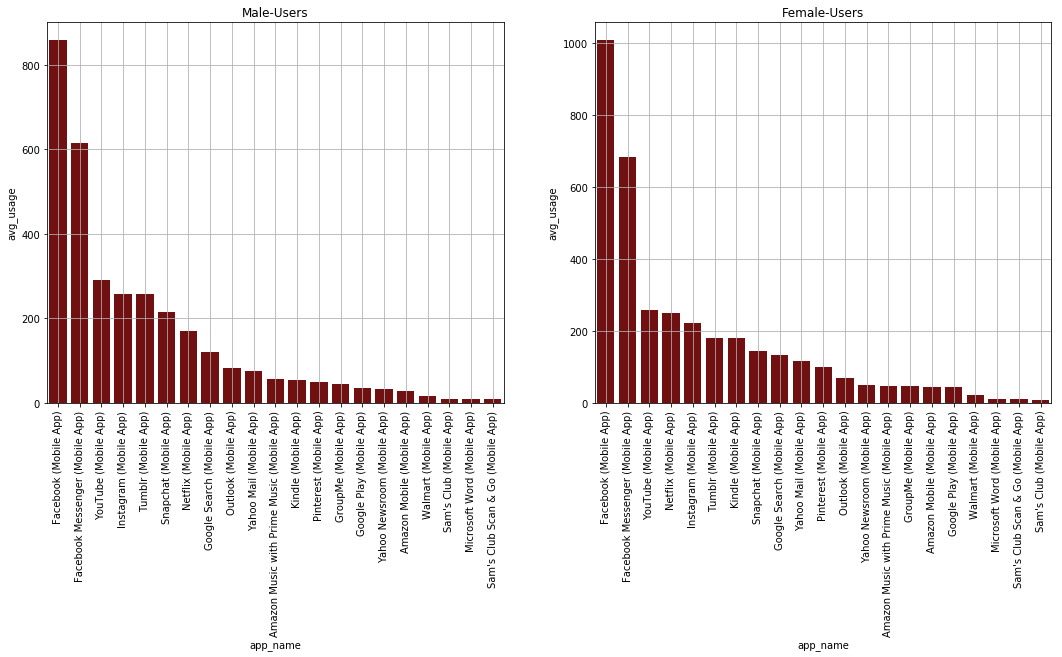

In [34]:
f = {'app_name' : ['count'], 'minutes' : ['sum']}
avg_app_usage = final_df.groupby(['app_name', 'gender_id']).agg(f).reset_index()
avg_app_usage.columns = avg_app_usage.columns.droplevel()
avg_app_usage.columns = ['app_name','gender', 'total_devices','total_minutes']
avg_app_usage['avg_usage'] = avg_app_usage['total_minutes']/avg_app_usage['total_devices']

avg_app_usage_male = avg_app_usage[avg_app_usage['gender']==1.0].sort_values('avg_usage', ascending = False)
avg_app_usage_female = avg_app_usage[avg_app_usage['gender']==2.0].sort_values('avg_usage', ascending = False)

plt.figure(figsize = (18, 7))
plt.subplot(121)
sns.barplot(y = 'avg_usage',x = 'app_name', data = avg_app_usage_male, color = 'maroon')
plt.grid()
plt.title('Male-Users')
plt.xticks(rotation = 90)

plt.subplot(122)
sns.barplot(y = 'avg_usage', x = 'app_name', data = avg_app_usage_female, color = 'maroon')
plt.grid()
plt.title('Female-Users')
plt.xticks(rotation = 90)
plt.show()

Both the gender mostly uses Facebook apps & Youtube.

Besides that, we can see that male users prefer using Instagram, Tumbler & Snapchat. 

Female users prefer using Netflix, Instagram, Tumblr, & Kindle.

Depending on the target audience the above plots helps us to drive the content through different platforms for better reach.

## Analyzing Additional-data 

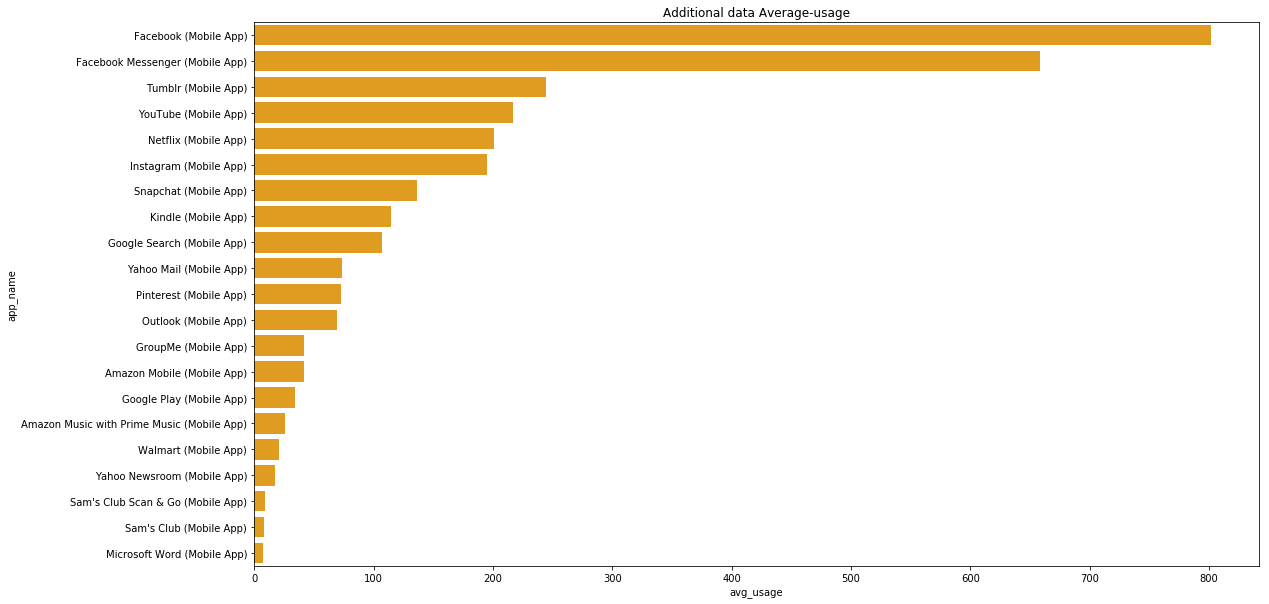

In [22]:
add_activity_data['avg_usage'] = add_activity_data['minutes'] / add_activity_data['total_devices']
add_activity_data = add_activity_data.sort_values('avg_usage', ascending = False)

plt.figure(figsize = (18,10))
sns.barplot(x = 'avg_usage', y = 'app_name', data = add_activity_data, color = 'orange')
plt.title('Additional data Average-usage')
plt.show()

In additional data, users considered seems to exhibit different patterns compared to initial set of users. 

Firstly, the avg-usage is slightly lower. Additinal data users seems to be using Tumblr more than Youtube & Instagram which is opposite with initial set users.

## Publisher-wise Analysis

In [23]:
app_publisher.Publisher.value_counts()

Microsoft Sites    3
Amazon Sites       3
Google Sites       3
Oath               3
Facebook           3
Wal-Mart           3
Snapchat, Inc      1
Netflix Inc.       1
Pinterest          1
Name: Publisher, dtype: int64

In [24]:
avg_publisher = pd.merge(avg_app_usage, app_publisher, how = 'left', on = 'app_name')

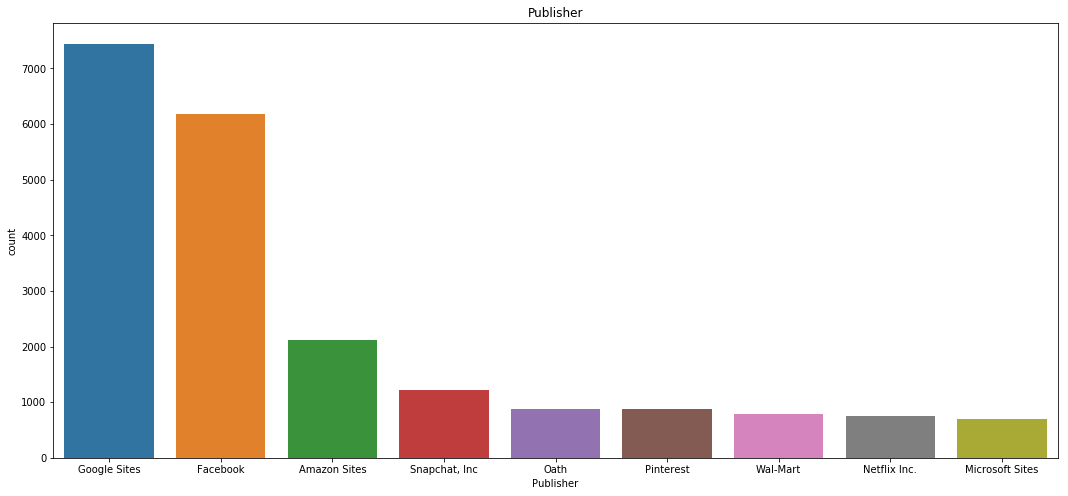

In [25]:
plt.figure(figsize = (18,8))
sns.countplot(x = 'Publisher', data = final_df, order = final_df['Publisher'].value_counts().index)
plt.title('Publisher')
plt.show() 

### Google Sites

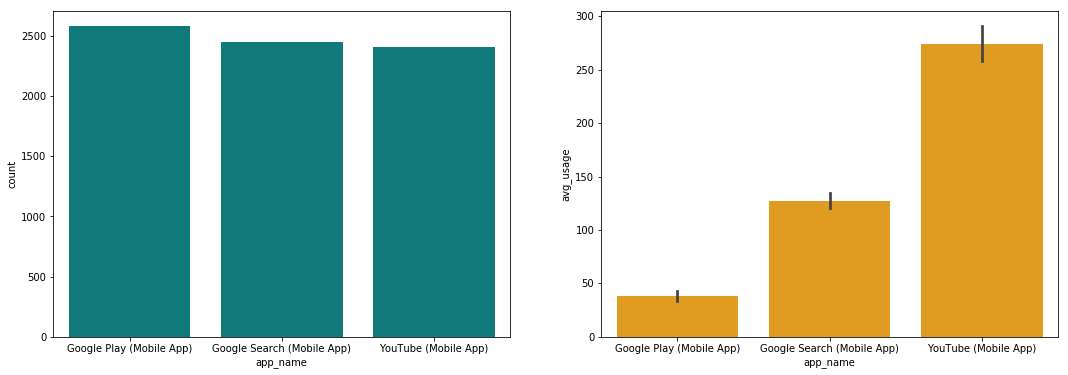

In [26]:
google_sites = final_df[final_df['Publisher'] == 'Google Sites']
avg_google_sites = avg_publisher[avg_publisher['Publisher'] == 'Google Sites']


plt.figure(figsize = (18,6))
plt.subplot(121)
sns.countplot(x = 'app_name', data = google_sites, order = google_sites['app_name'].value_counts().index, 
              color = 'darkcyan')

plt.subplot(122)
sns.barplot(x = 'app_name', y = 'avg_usage', data = avg_google_sites, color = 'orange')

plt.show()

Though Youtube seems to be slightly less installed app among all the google applications but Youtube has the highest average-usage rate. 

# Facebook

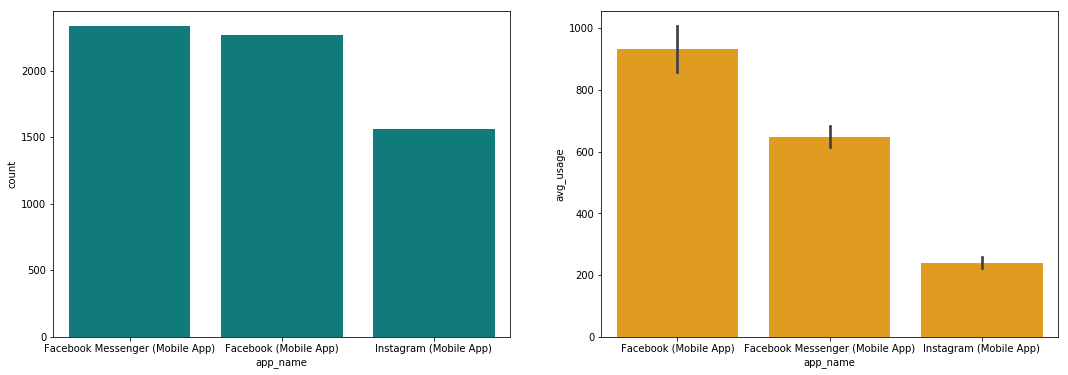

In [27]:
facebook = final_df[final_df['Publisher'] == 'Facebook']
avg_facebook = avg_publisher[avg_publisher['Publisher'] == 'Facebook']


plt.figure(figsize = (18,6))
plt.subplot(121)
sns.countplot(x = 'app_name', data = facebook, order = facebook['app_name'].value_counts().index, 
              color = 'darkcyan')

plt.subplot(122)
sns.barplot(x = 'app_name', y = 'avg_usage', data = avg_facebook, color = 'orange')

plt.show()

All the three facebook apps stands in the top 4 highest average-user apps with Facebook app being first followed by Facebook Messenger & Instagram.

## Amazon Sites

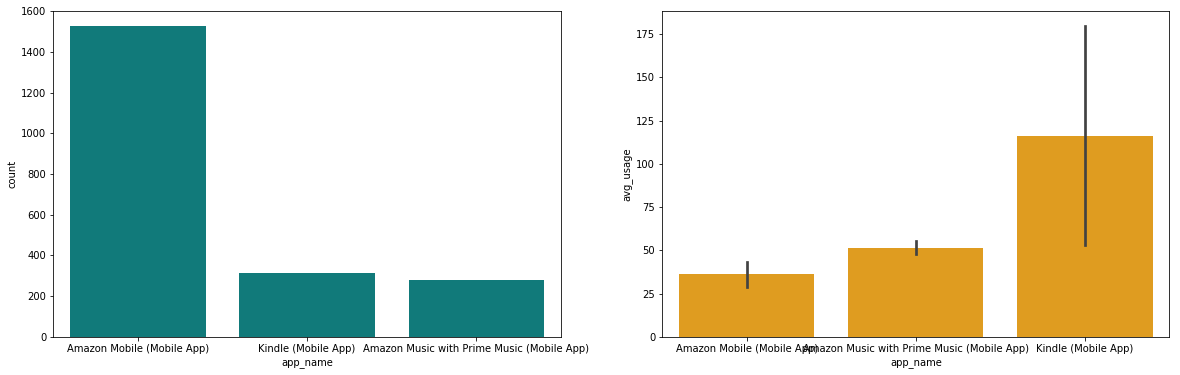

In [28]:
amazon = final_df[final_df['Publisher'] == 'Amazon Sites']
avg_amazon = avg_publisher[avg_publisher['Publisher'] == 'Amazon Sites']


plt.figure(figsize = (20,6))
plt.subplot(121)
sns.countplot(x = 'app_name', data = amazon, order = amazon['app_name'].value_counts().index, 
              color = 'darkcyan')

plt.subplot(122)
sns.barplot(x = 'app_name', y = 'avg_usage', data = avg_amazon, color = 'orange')

plt.show()

Kindle has better Average-user rate among all the apps from Amazon.

## Oath.

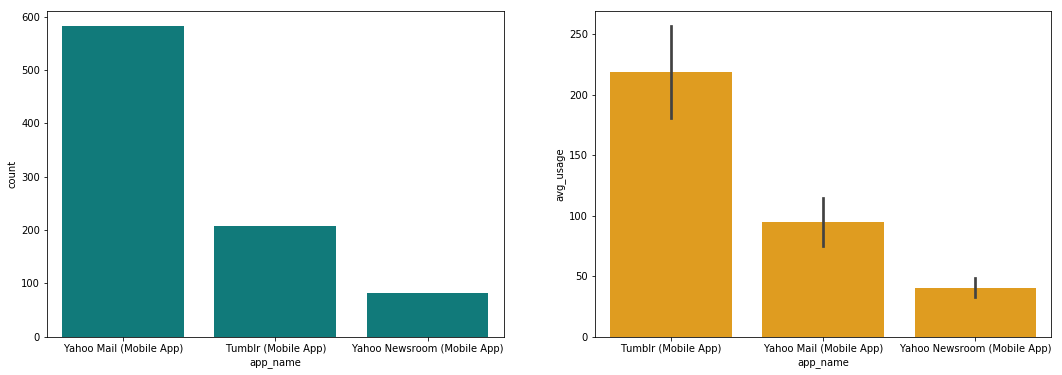

In [29]:
oath = final_df[final_df['Publisher'] == 'Oath']
avg_oath = avg_publisher[avg_publisher['Publisher'] == 'Oath']


plt.figure(figsize = (18,6))
plt.subplot(121)
sns.countplot(x = 'app_name', data = oath, order = oath['app_name'].value_counts().index, 
              color = 'darkcyan')

plt.subplot(122)
sns.barplot(x = 'app_name', y = 'avg_usage', data = avg_oath, color = 'orange')

plt.show()

Tumblr stands top with highest Average-user rate among all the apps from Oath.

## Wal-Mart

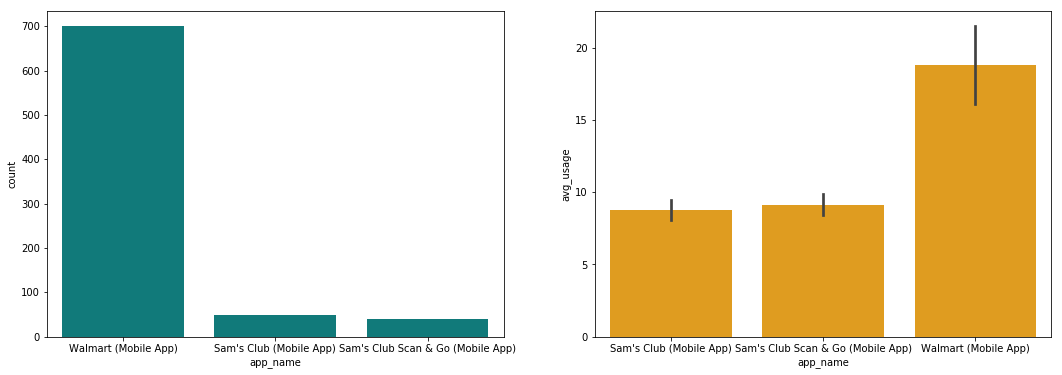

In [30]:
walmart = final_df[final_df['Publisher'] == 'Wal-Mart']
avg_walmart = avg_publisher[avg_publisher['Publisher'] == 'Wal-Mart']


plt.figure(figsize = (18,6))
plt.subplot(121)
sns.countplot(x = 'app_name', data = walmart, order = walmart['app_name'].value_counts().index, 
              color = 'darkcyan')

plt.subplot(122)
sns.barplot(x = 'app_name', y = 'avg_usage', data = avg_walmart, color = 'orange')

plt.show()

All the walmart apps stands in the top 4 least Average-user ratings.

## Microsoft Sites

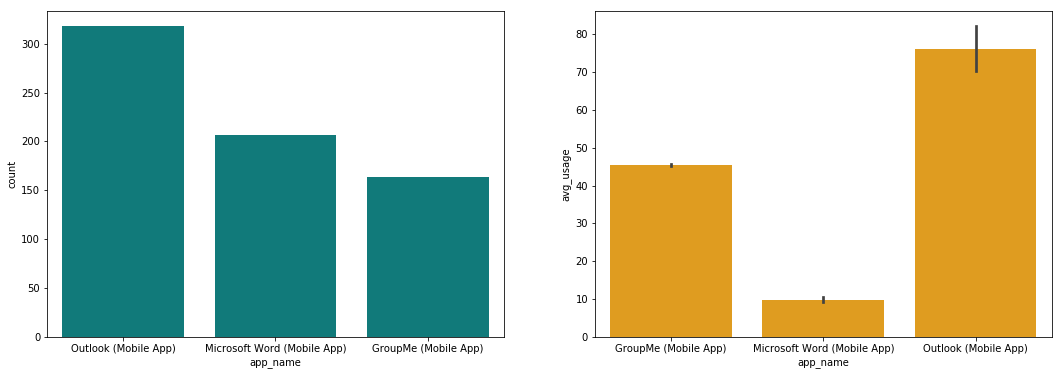

In [31]:
microsoft = final_df[final_df['Publisher'] == 'Microsoft Sites']
avg_microsoft = avg_publisher[avg_publisher['Publisher'] == 'Microsoft Sites']


plt.figure(figsize = (18,6))
plt.subplot(121)
sns.countplot(x = 'app_name', data = microsoft, order = microsoft['app_name'].value_counts().index, 
              color = 'darkcyan')

plt.subplot(122)
sns.barplot(x = 'app_name', y = 'avg_usage', data = avg_microsoft, color = 'orange')

plt.show()

Outlook has the highest average-user rating as well as the most installed app of all the Microsoft apps followed by GroupMe and Word.